<a href="https://colab.research.google.com/github/sherapshrestha/Text_Analysis_Final_Project/blob/main/Final_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the Reddit Influence on Meme Stock Performance: A case study of GME


#### Background, Introduction, Hypothesis, Data Collection

**Introduction**

In the year 2021, the stock market experienced what has come to be known as the meme stock frenzy, a phenomenon characterized by the meteoric rise of certain stocks fueled primarily by online communities. What is a meme stock? A meme stock refers to a company's shares that experience a rapid and significant surge in price, often becoming overvalued compared to their underlying fundamentals due to heightened attention on social media platforms and forums. [(Yousaf, Pham, Goodell, January 2023)](https://www-sciencedirect-com.ezproxy.cul.columbia.edu/science/article/pii/S1042443122001664) This attention is typically driven by collective enthusiasm, humor, and speculation, rather than traditional factors like earnings or growth potential. Platforms like Reddit play a pivotal role in this phenomenon, serving as spaces where retail investors gather to discuss strategies, share insights, and express opinions and sentiments about stocks.

The most notable event of the meme stock frenzy occurred in January 2021, when GameStop (GME) experienced a dramatic short squeeze. This event was largely orchestrated by users of the r/wallstreetbets subreddit, a community known for its high-risk, high-reward trading strategies and collective investment movements. [(Costola, Iacopini, Santagiustina, October 2021)](https://www.sciencedirect.com/science/article/pii/S0165176521002986?via%3Dihub)Through viral discussions and coordinated action, users identified the potential for a short squeeze in GameStop, rallying retail investors to buy shares and options. This unprecedented collective effort not only drove GameStop's stock price to historic highs but also caused significant losses for hedge funds with substantial short positions.

For my project, I sought to explore the relationship between Reddit discussions and GameStop’s price surge, focusing on the themes and sentiments expressed by users during this critical period. Specifically, I aimed to understand how narratives, emotional language, and collective sentiment on r/WallStreetBets contributed to the price movement. By examining key discussions, memes, and arguments that emerged during this time, my research highlights the power of retail investors in shaping market dynamics and the role of social media in amplifying collective action. This exploration provides valuable insights into the intersection of technology, online communities, and financial markets, illustrating how sentiment-driven movements can disrupt traditional market forces and create ripple effects across the financial system.

**Hypothesis:**

The hypothesis driving this project is: "Online narratives and sentiment within the r/WallStreetBets subreddit were instrumental in driving the unprecedented volatility and price movement of GME stock." By examining the sentiment, thematic content, and timing of Reddit comments, this study seeks to identify the specific ways in which online communities influenced market behavior. This research also aims to explore the broader implications of social media on financial markets, particularly concerning retail investor dynamics and the challenges posed to traditional institutional investors.


**Data Collection**

As part of my project for a Python-based text analysis class, I delved into Reddit discussions during the height of the GameStop (GME) stock surge, focusing specifically on posts made by the influential r/WallStreetBets user DeepF******Value. This analysis centered on the period from January 26th to January 28th, 2021, when GameStop’s stock price reached its peak during the historic short squeeze. Utilizing the Reddit API, I extracted a total of 420 top-scored comments from DeepF******Value’s posts. By concentrating on these highly upvoted comments, my goal was to capture the most impactful and widely resonant conversations within the r/WallStreetBets community. These comments reflected the sentiments, themes, and strategies discussed by users as they collectively responded to the dramatic rise in GME’s price.
During the research phase, a publicly available CSV file was identified, containing Reddit comments related to GME from a specific date during the stock’s volatile period. This dataset supplemented previously extracted comments from the r/WallStreetBets subreddit. The CSV file provided a broader context by including comments from other related discussions, ensuring a richer and more diverse data pool.
The dataset was analyzed to explore sentiment trends and thematic structures within the comments. By focusing on this file, the research aimed to identify key words that frequently appeared and to uncover dominant topics discussed during that period. The integration of this dataset enabled a comparative analysis with the manually extracted Reddit data, providing a robust foundation for thematic exploration.


In the next few codes, I am using the PRAW library to interact with the Reddit API. The extract_top_comments_around_peak function retrieves the top comments from a Reddit post within a defined time window—two days after the peak date in this case. The extract_top_comments_around_peak function code is adapted from the professor's code and guidance shared on a file and used ChatGPT to align the code with my requirement. The prompt I used in ChatGPT: Given the code, can you change it in a way that I can use it to extract comments from Jan 28th, and extend the date to up to two days making sure I extract comments with highest upvotes.

#### Setting the Reddit Environment


In [ ]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
import praw
import csv
import os
import time
from datetime import datetime, timedelta

In [ ]:
os.environ['REDDIT_CLIENT_ID'] = 'bMWovYKOFZZD_E1aIcHP7Q'
os.environ['REDDIT_CLIENT_SECRET'] = 'lOkg5qhOk3QjqJBzkk9xI_JQ_P3Jww'
os.environ['REDDIT_USER_AGENT'] = 'DataFetcher:1.0:GoogleColab (by /u/Diligent-Resource-97)'

#### Extracting comments from Reddit using Reddit API

In [ ]:
def extract_top_comments_around_peak(reddit, url, csv_filename, peak_date, days_after=2, top_n_comments=150):
    # Convert peak date to Unix timestamp
    peak_timestamp = int(datetime.strptime(peak_date, "%Y-%m-%d").timestamp())

    # Set start and end timestamps to include only peak day and the following two days
    start_time = peak_timestamp  # Start at the beginning of the peak date
    end_time = peak_timestamp + (days_after * 86400)  # Extend for 2 days after the peak date

    # Access the submission and fetch all comments
    submission = reddit.submission(url=url)
    submission.comments.replace_more(limit=None)

    # Filter comments within the desired time window
    filtered_comments = [
        comment for comment in submission.comments
        if start_time <= comment.created_utc < end_time
    ]

    # Sort comments by score and retrieve the top 150 comments
    top_comments = sorted(filtered_comments, key=lambda x: x.score, reverse=True)[:top_n_comments]

    # Write the top comments to CSV
    with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Comment ID', 'Parent ID', 'Comment Body', 'Comment Score'])

        for comment in top_comments:
            writer.writerow([comment.id, comment.parent_id, comment.body, comment.score])

    print(f"Top {top_n_comments} comments written to {csv_filename}")

In [ ]:
reddit = praw.Reddit(
    client_id=os.getenv('REDDIT_CLIENT_ID'),
    client_secret=os.getenv('REDDIT_CLIENT_SECRET'),
    user_agent=os.getenv('REDDIT_USER_AGENT'),
    check_for_async=False
)

The code shows that I was able to capture 170 comments since Reddit was not allowing me to extract more than 170 comments I chose three different post of DeepFValue to capture the true sentiment. The other two links that I used are:
'https://www.reddit.com/r/wallstreetbets/comments/l5nphz/gme_yolo_update_jan_26_2021/'
'https://www.reddit.com/r/wallstreetbets/comments/l6ekdz/gme_yolo_update_jan_27_2021_guess_i_need_102/
From 26th Jan post I retrived 150 comments and from the 27th Jan post I extracted 100 comments using similar code and saving it to a csv file.

In [ ]:
post_url = 'https://www.reddit.com/r/wallstreetbets/comments/l78uct/gme_yolo_update_jan_28_2021/'
csv_filename = 'gme_jan282021_comments.csv'
peak_date = '2021-01-28'
days_after = 2
top_n_comments = 170

In [ ]:
extract_top_comments_around_peak(reddit, post_url, csv_filename, peak_date, days_after, top_n_comments)
time.sleep(2)

Top 170 comments written to gme_jan282021_comments.csv


In [ ]:
import pandas as pd

In [ ]:
comments_df.head(30)

In [ ]:
comments_df = pd.read_csv('gme_jan282021_comments.csv')

In [ ]:
csv_filename = 'gme_jan2021_comments.csv'
comments_df.to_csv(csv_filename, index=False)

In [ ]:
from google.colab import files
files.download('gme_jan2021_comments.csv')

Once I dowloaded all the files required I mounted the google drive and did normal preprocessing of the files like removing the deleted comments which was extracted which would not be helpful for analysis. I asked ChatGPT to provide me with a function to remove the comments which are "removed" or "deleted."

#### Data Cleaning and Merging three dataframes into one.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file1= '/content/drive/MyDrive/Python_course/Final_Project/gme_jan262021_comments.csv'
file2= '/content/drive/MyDrive/Python_course/Final_Project/gme_jan272021_comments.csv'
file3= '/content/drive/MyDrive/Python_course/Final_Project/gme_jan282021_comments.csv'

In [ ]:
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

In [ ]:
print(df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Comment ID     150 non-null    object
 1   Parent ID      150 non-null    object
 2   Comment Body   150 non-null    object
 3   Comment Score  150 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 4.8+ KB
None
  Comment ID  Parent ID                                       Comment Body  \
0    gkvbbyn  t3_l5nphz  Im not saying you have to do anything, but I a...   
1    gkvc0uf  t3_l5nphz  This fucking madlad gained 9 MILLION today and...   
2    gkvba7f  t3_l5nphz                                          [deleted]   
3    gkvb9n4  t3_l5nphz  Every trading session as I see GME soar, I tel...   
4    gkvbf1z  t3_l5nphz                                          [deleted]   

   Comment Score  
0          26051  
1          16067  
2          15633  
3          14181  
4          10888  


In [ ]:
print(df2.info())
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Comment ID     100 non-null    object
 1   Parent ID      100 non-null    object
 2   Comment Body   100 non-null    object
 3   Comment Score  100 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ KB
None
  Comment ID  Parent ID                                       Comment Body  \
0    gl01wtg  t3_l6ekdz                       HE'S STILL IN, I'M STILL IN.   
1    gl04fgz  t3_l6ekdz                                          [removed]   
2    gl01xfi  t3_l6ekdz  As soon as Elon tweeted, "Gamestonk!!" yesterd...   
3    gl01vvx  t3_l6ekdz                                     #HE HASNT SOLD   
4    gl02qqf  t3_l6ekdz  Makes 25M IN A SINGLE DAY, and still doesn't f...   

   Comment Score  
0          35117  
1          31937  
2          16784  
3          16101  
4          15870  


In [ ]:
print(df3.info())
print(df3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Comment ID     170 non-null    object
 1   Parent ID      170 non-null    object
 2   Comment Body   170 non-null    object
 3   Comment Score  170 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.4+ KB
None
  Comment ID  Parent ID                                       Comment Body  \
0    gl5a2mt  t3_l78uct                    IF HE'S STILL IN, I'M STILL IN.   
1    gl5a3bu  t3_l78uct                                            WE HOLD   
2    gl5afzq  t3_l78uct  The real Robin Hood was /u/DeepFuckingValue al...   
3    gl5a4wo  t3_l78uct                     THE KING HAS SPOKEN **HOLD** 🦍   
4    gl5a3rc  t3_l78uct  In our darkest hours, u/DeepFuckingValue held....   

   Comment Score  
0          44164  
1          39478  
2          30418  
3          29073  
4          27192  


In [ ]:
import pandas as pd

def clean_comment_body(text):
    """
    Cleans the Comment Body column.
    - Removes [removed], [deleted], and NaN comments.
    - Retains numbers and special characters.
    """
    if pd.isnull(text) or text in ["[removed]", "[deleted]"]:
        return None  # Mark for removal
    return text.strip()  # Keep the original text but remove leading/trailing whitespace

# Apply the cleaning function to each DataFrame
for df in [df1, df2, df3]:
    df['Comment Body'] = df['Comment Body'].apply(clean_comment_body)

# Remove rows where Comment Body is None
for df in [df1, df2, df3]:
    df.dropna(subset=['Comment Body'], inplace=True)

In [ ]:
 # Combine all DataFrames into one
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# Save the cleaned data to a CSV file
merged_df.to_csv('cleaned_comments.csv', index=False)

In [ ]:
from google.colab import files

# Save the merged DataFrame to a CSV file
merged_df.to_csv('merged_comments.csv', index=False)

# Download the file
files.download('merged_comments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(merged_df.shape)
print(merged_df.head())

(361, 4)
  Comment ID  Parent ID                                       Comment Body  \
0    gkvbbyn  t3_l5nphz  Im not saying you have to do anything, but I a...   
1    gkvc0uf  t3_l5nphz  This fucking madlad gained 9 MILLION today and...   
2    gkvb9n4  t3_l5nphz  Every trading session as I see GME soar, I tel...   
3    gkvb9zn  t3_l5nphz  DFV, thank you for your strong conviction and ...   
4    gkvbazi  t3_l5nphz                                    THE GOAT OF WSB   

   Comment Score  
0          26051  
1          16067  
2          14181  
3           9382  
4           4771  


#### Word Cloud

In the code below I have used several stop words to improve my word cloud and understand and observe which words showed up frequently.
The following script is adapted from Professor's Krisel lecture **Principles of text analysis: Cleaning and processing text for analysis with the NLTK library.** [(Krisel, 2024)](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

The words that appeared frequently are sell, people, million as seen in the output.

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
import re

# Download stopwords if necessary
nltk.download('stopwords')

# Default stop words
stop_words = set(stopwords.words('english'))

# Add custom stop words
custom_stop_words = {'im', 'gme', 'dfv', 'like', 'hold', 'still', 'fucking', 'fuck', 'money', 'the','hes','us', 'stock', 'fucks', 'today', 'gamestop', 'man', 'youre', 'udeepfuckingvalue'}
stop_words.update(custom_stop_words)

# Tokenize and filter stopwords
# Normalize text: convert to lowercase and remove punctuation
words = ' '.join(merged_df['Comment Body']).lower()
words = re.sub(r'[^\w\s]', '', words)  # Remove punctuation
words = words.split()

# Filter stopwords
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)
print(word_counts.most_common(10))

[('sell', 32), ('people', 30), ('one', 28), ('dont', 26), ('million', 25), ('day', 25), ('way', 24), ('short', 23), ('see', 22), ('shit', 22)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


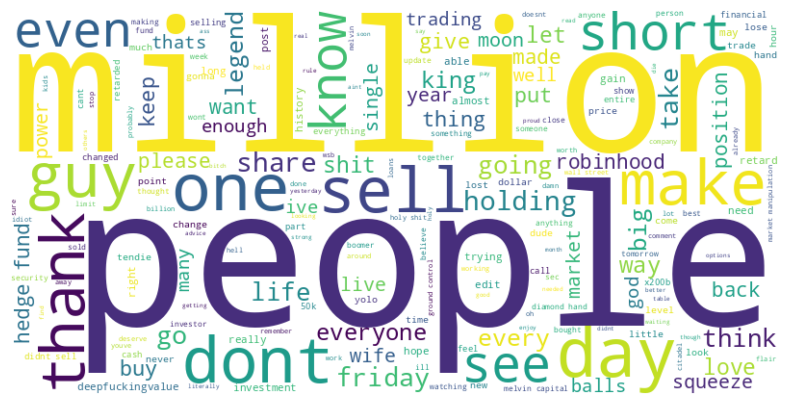

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### TextBlob

I aksed ChatGPT to give me the code for Textblob, the output shows that majority of the comments are neutral which shows that the sentiment techniques are not built to capture the slangs and nuances of human communication. The distribution shows that a lot comments fall under neutral category.  

In [ ]:
from textblob import TextBlob

In [ ]:
def calculate_textblob_sentiment(comment_body):
    """
    Calculates the TextBlob sentiment polarity and subjectivity.
    """
    blob = TextBlob(comment_body)
    return blob.sentiment

# Apply TextBlob sentiment analysis to each comment in merged_df
merged_df['TextBlob_Sentiment'] = merged_df['Comment Body'].apply(calculate_textblob_sentiment)

# Split the TextBlob sentiment into Polarity and Subjectivity columns in merged_df
merged_df[['Polarity', 'Subjectivity']] = merged_df['TextBlob_Sentiment'].apply(pd.Series)

In [ ]:
print(merged_df[['Comment Body', 'Polarity', 'Subjectivity']].head())

                                        Comment Body  Polarity  Subjectivity
0  Im not saying you have to do anything, but I a...  0.100000      0.533333
1  This fucking madlad gained 9 MILLION today and... -0.335714      0.507143
2  Every trading session as I see GME soar, I tel...  0.625000      0.500000
3  DFV, thank you for your strong conviction and ...  0.117696      0.440249
4                                    THE GOAT OF WSB  0.000000      0.000000


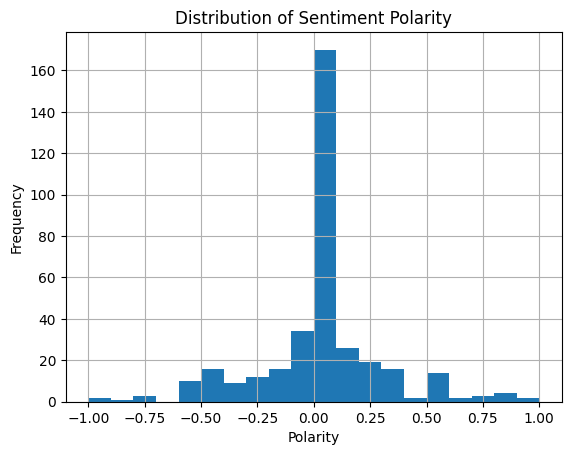

In [ ]:
# Plot a histogram for polarity
merged_df['Polarity'].hist(bins=20)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Sort comments by Polarity
top_positive = merged_df.sort_values(by='Polarity', ascending=False).head(10)
top_negative = merged_df.sort_values(by='Polarity', ascending=True).head(10)

# Filter neutral comments (close to 0 polarity) and get the top 10
neutral_threshold = 0.03  # Define a small range for neutrality
neutral_comments = merged_df[(merged_df['Polarity'] >= -neutral_threshold) &
                             (merged_df['Polarity'] <= neutral_threshold)].head(10)

In [ ]:
from IPython.display import display

# Display top 10 positive comments
display(top_positive[['Comment Body', 'Polarity']])

# Display top 10 negative comments
display(top_negative[['Comment Body', 'Polarity']])

# Display top 10 neutral comments
display(neutral_comments[['Comment Body', 'Polarity']])

,Comment Body,Polarity
10,I HAVE BEEN WAITING FOR THIS ALL DAY AND IT'S ...,1.00000
278,"Have a wonderful day, u/DeepFuckingValue! ❤️",1.00000
309,You beautiful diamond handed person,0.85000
79,Remember: Hold until Friday. Friday is when ca...,0.80000
340,I'm proud to be a part of this revolution you ...,0.80000
232,HE'S IN I'M IN 💎✋ WILL WIN,0.80000
243,If DFV can hold! I can hold! You can hold! WE ...,0.78125
76,In 2050 people will be talking about how u/Dee...,0.75000
23,This is the best thing on reddit. Way better t...,0.75000
2,"Every trading session as I see GME soar, I tel...",0.62500


,Comment Body,Polarity
30,Holy crap! Take my wife!\n\nEDIT: If her boyfr...,-1.00
71,YOU FUCKING LEGEND!!!,-1.00
100,Fck these bastards \nhttps://www.marketwatch.c...,-0.85
8,"I'd literally die for you, you fucking hero. F...",-0.80
183,47 MILLION! WHAT A FUCKING LEGEND!,-0.75
40,"Just think, you were here once: [https://www.r...",-0.75
269,They really fucked you man.,-0.60
306,LETS FUCKING GO OUR KING,-0.60
179,Fucking vibranium hands,-0.60
223,HE FUCKING HELD WHAT A LEGEND,-0.60


,Comment Body,Polarity
4,THE GOAT OF WSB,0.000000
7,The day you stop posting these updates is the ...,0.000000
11,GME to $1000 🚀🚀🚀🚀🚀🚀,0.000000
12,I thought there was a limit as to how erect my...,0.000000
13,Are you accepting applications for adoption?,0.000000
18,DeepFuckingValue will be a billionaire soon.,0.000000
19,THE KING LIVES ON!\n\nDFV Hands!,0.000000
21,and people wondered why you didn't sell yester...,0.000000
22,The fuck is going on? I’m up 89k on my options...,-0.014286
24,"At this point, there is no way this cat is gon...",-0.027778


#### Vader

For Vader, I used the initial code provided in the professor's syllabus and asked ChatGPT to align it to three different sentiment scores, positive negative and neutral. For neutral comments I amended to those comments with less than 0.3 sentiment scores.

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sentimentAnalyser = SentimentIntensityAnalyzer()

In [ ]:
def calculate_vader_sentiment(comment_body):
    """
    Calculates the VADER sentiment scores.
    """
    return sentimentAnalyser.polarity_scores(comment_body)


In [ ]:
merged_df['VADER_Sentiment'] = merged_df['Comment Body'].apply(calculate_vader_sentiment)

In [ ]:
merged_df[['Positive', 'Neutral', 'Negative']] = merged_df['VADER_Sentiment'].apply(pd.Series)[['pos', 'neu', 'neg']]

In [ ]:
merged_df.sort_values(by='Positive', ascending=False)[:10]


,Comment ID,Parent ID,Comment Body,Comment Score,TextBlob_Sentiment,Polarity,Subjectivity,Sentiment Scores,Positive,Neutral,Negative,VADER_Sentiment
302,gl5a5lf,t3_l78uct,RESPECT,25,"(0.0, 0.0)",0.000000,0.000000,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",1.000,0.000,0.0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
354,gl5a6n6,t3_l78uct,YES DADDY,11,"(0.0, 0.0)",0.000000,0.000000,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.730,0.270,0.0,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou..."
268,gl5a60l,t3_l78uct,DIAMOND HANDS DIAMOND HANDS!,73,"(0.0, 0.0)",0.000000,0.000000,"{'neg': 0.0, 'neu': 0.282, 'pos': 0.718, 'comp...",0.718,0.282,0.0,"{'neg': 0.0, 'neu': 0.282, 'pos': 0.718, 'comp..."
300,gl5a56m,t3_l78uct,God bless this man,26,"(0.0, 0.0)",0.000000,0.000000,"{'neg': 0.0, 'neu': 0.29, 'pos': 0.71, 'compou...",0.710,0.290,0.0,"{'neg': 0.0, 'neu': 0.29, 'pos': 0.71, 'compou..."
271,gl5a5nr,t3_l78uct,OK ALL IS WELL,64,"(0.5, 0.5)",0.500000,0.500000,"{'neg': 0.0, 'neu': 0.317, 'pos': 0.683, 'comp...",0.683,0.317,0.0,"{'neg': 0.0, 'neu': 0.317, 'pos': 0.683, 'comp..."
309,gl5a63d,t3_l78uct,You beautiful diamond handed person,22,"(0.85, 1.0)",0.850000,1.000000,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.677,0.323,0.0,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp..."
264,gl5a4kh,t3_l78uct,HOLD STRONG BROTHER!,98,"(0.5416666666666666, 0.7333333333333333)",0.541667,0.733333,"{'neg': 0.0, 'neu': 0.358, 'pos': 0.642, 'comp...",0.642,0.358,0.0,"{'neg': 0.0, 'neu': 0.358, 'pos': 0.642, 'comp..."
249,gl5a64t,t3_l78uct,APES TOGETHER STRONG,294,"(0.4333333333333333, 0.7333333333333333)",0.433333,0.733333,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...",0.623,0.377,0.0,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp..."
261,gl5a5ud,t3_l78uct,WE LOVE YOU WE LOVE THE MODS WE LOVE THIS STOCK!,163,"(0.5416666666666666, 0.6)",0.541667,0.600000,"{'neg': 0.0, 'neu': 0.383, 'pos': 0.617, 'comp...",0.617,0.383,0.0,"{'neg': 0.0, 'neu': 0.383, 'pos': 0.617, 'comp..."
292,gl5a5y4,t3_l78uct,What a fucking hero,32,"(-0.6, 0.8)",-0.600000,0.800000,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.565,0.435,0.0,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp..."


In [ ]:
merged_df.sort_values(by='Negative', ascending=False)[:10]

,Comment ID,Parent ID,Comment Body,Comment Score,TextBlob_Sentiment,Polarity,Subjectivity,Sentiment Scores,Positive,Neutral,Negative,VADER_Sentiment
247,gl5a52v,t3_l78uct,Holy fuck,440,"(-0.4, 0.6)",-0.400000,0.600000,"{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp...",0.000,0.222,0.778,"{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp..."
82,gkvbc0p,t3_l5nphz,AVE U/DEEPFUCKINGVALUE! VICTOR IMPERATOR! 🔥🔥🔥,15,"(0.0, 0.0)",0.000000,0.000000,"{'neg': 0.661, 'neu': 0.339, 'pos': 0.0, 'comp...",0.000,0.339,0.661,"{'neg': 0.661, 'neu': 0.339, 'pos': 0.0, 'comp..."
325,gl5a5mg,t3_l78uct,FUCK YES.,16,"(-0.4, 0.6)",-0.400000,0.600000,"{'neg': 0.565, 'neu': 0.0, 'pos': 0.435, 'comp...",0.435,0.000,0.565,"{'neg': 0.565, 'neu': 0.0, 'pos': 0.435, 'comp..."
269,gl5a55e,t3_l78uct,They really fucked you man.,72,"(-0.6, 0.7)",-0.600000,0.700000,"{'neg': 0.54, 'neu': 0.46, 'pos': 0.0, 'compou...",0.000,0.460,0.540,"{'neg': 0.54, 'neu': 0.46, 'pos': 0.0, 'compou..."
212,gl02335,t3_l6ekdz,#QUICK SOMEONE SUCK HIS HUGE DICK,31,"(0.3666666666666667, 0.7)",0.366667,0.700000,"{'neg': 0.539, 'neu': 0.261, 'pos': 0.2, 'comp...",0.200,0.261,0.539,"{'neg': 0.539, 'neu': 0.261, 'pos': 0.2, 'comp..."
353,gl5d5vr,t3_l78uct,Hahahaha fuck you Wallstreet,11,"(-0.1, 0.55)",-0.100000,0.550000,"{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'comp...",0.000,0.462,0.538,"{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'comp..."
330,gl5a62a,t3_l78uct,Motherfucker is still in! LET'S GO!,15,"(0.0, 0.0)",0.000000,0.000000,"{'neg': 0.509, 'neu': 0.491, 'pos': 0.0, 'comp...",0.000,0.491,0.509,"{'neg': 0.509, 'neu': 0.491, 'pos': 0.0, 'comp..."
131,gkvbr6w,t3_l5nphz,Stop! I can only get so hard!,8,"(-0.18229166666666669, 0.7708333333333333)",-0.182292,0.770833,"{'neg': 0.482, 'neu': 0.518, 'pos': 0.0, 'comp...",0.000,0.518,0.482,"{'neg': 0.482, 'neu': 0.518, 'pos': 0.0, 'comp..."
75,gkvhjsq,t3_l5nphz,The Wolf of Tard Street,19,"(0.0, 0.0)",0.000000,0.000000,"{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'comp...",0.000,0.533,0.467,"{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'comp..."
153,gl01ycx,t3_l6ekdz,PLEASE FUCK MY WIFE,890,"(-0.4, 0.6)",-0.400000,0.600000,"{'neg': 0.449, 'neu': 0.256, 'pos': 0.295, 'co...",0.295,0.256,0.449,"{'neg': 0.449, 'neu': 0.256, 'pos': 0.295, 'co..."


In [ ]:
neutral_threshold = 0.3  # Adjust the threshold for neutrality
merged_df[merged_df['Neutral'] >= neutral_threshold].sort_values(by='Neutral', ascending=False)[:10]

,Comment ID,Parent ID,Comment Body,Comment Score,TextBlob_Sentiment,Polarity,Subjectivity,Sentiment Scores,Positive,Neutral,Negative,VADER_Sentiment
360,gl5a6jq,t3_l78uct,"IF HE'S STILL IN, I'M STILL IN.",10,"(0.0, 0.0)",0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
215,gl027a4,t3_l6ekdz,This man made 20 million dollars today. Think ...,25,"(0.0, 0.0)",0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
190,gl03w9t,t3_l6ekdz,DFV is Robin Hood.,67,"(0.0, 0.0)",0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
93,gkvbb4t,t3_l5nphz,Bra,13,"(0.0, 0.0)",0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
92,gl00zzd,t3_l5nphz,Anyone else here refreshing for today's update,14,"(0.5, 1.0)",0.5,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
91,gkvbd8u,t3_l5nphz,"IF HE'S STILL IN, I'M STILL IN \n\n\n🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀",14,"(0.0, 0.0)",0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
193,gl01yts,t3_l6ekdz,HE 💎🤌 🚀IS💎🤌 🚀STILL 💎🤌 🚀IN💎🤌🚀,59,"(0.0, 0.0)",0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
194,gl01ybv,t3_l6ekdz,HE’S STILL IN.,57,"(0.0, 0.0)",0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
197,gl01xkn,t3_l6ekdz,LEGEND,46,"(0.0, 0.0)",0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
198,gl03yyo,t3_l6ekdz,Get to 10 digits daddy 💎💎💎🙌🙌🙌🚀🚀🚀,43,"(0.0, 0.0)",0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


The next few output shows the top 10 positive, negative and neutral comments using plotly. This output gives a clearer picture and helps us see what are some of the comments that is highlighted based on the VADER sentiment analysis. From the output, we can see that the tool is more nuanced in capturing slangs and social media sentiment. There is no surprise here because VADER as we know is mostly used to capture the social media sentiment. The distribution of the comments categorized as positive, negative and neutral shows that a lot of comments fall under neutral category. I must highlight here that a lot of users have expressed using extreme language, on one hand we know that the comments posted are the true sentiment and because Reddit is anonymous, it helps people to be themselves but the language used can be little uncomfortable to see.

In [ ]:
import plotly.graph_objects as go

In [ ]:
positive_table = go.Figure(data=[go.Table(
    header=dict(values=['Comment Body', 'Positive'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[top_positive['Comment Body'], top_positive['Positive']],
               fill_color='lavender',
               align='left'))
])

positive_table.update_layout(title_text="Top 10 Positive Comments")
positive_table.show()

# Interactive table for negative comments
negative_table = go.Figure(data=[go.Table(
    header=dict(values=['Comment Body', 'Negative'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[top_negative['Comment Body'], top_negative['Negative']],
               fill_color='lavender',
               align='left'))
])

negative_table.update_layout(title_text="Top 10 Negative Comments")
negative_table.show()



In [ ]:
import plotly.graph_objects as go

# Filter and sort neutral comments
neutral_threshold = 0.3  # Adjust the threshold for neutrality
neutral_comments = merged_df[merged_df['Neutral'] >= neutral_threshold].sort_values(by='Neutral', ascending=False).head(10)

# Create an interactive table for neutral comments
neutral_table = go.Figure(data=[go.Table(
    header=dict(
        values=['Comment Body', 'Neutral Score'],  # Table headers
        fill_color='paleturquoise',
        align='left'
    ),
    cells=dict(
        values=[
            neutral_comments['Comment Body'].tolist(),  # Convert column to list
            neutral_comments['Neutral'].tolist()  # Convert column to list
        ],
        fill_color='lavender',
        align='left'
    ))
])

# Add a title
neutral_table.update_layout(title_text="Top 10 Neutral Comments")

# Show the table
neutral_table.show()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def calculate_compound_score(comment):
    """
    Analyze the compound sentiment score of a single comment.
    """
    sentiment_scores = analyzer.polarity_scores(comment)
    return sentiment_scores['compound']

In [ ]:
merged_df['Compound'] = merged_df['Comment Body'].apply(calculate_compound_score)

In [ ]:
# Define thresholds for neutrality
neutral_threshold = 0.3

# Top 10 Positive Comments
top_positive = merged_df.sort_values(by='Compound', ascending=False).head(10)

# Top 10 Negative Comments
top_negative = merged_df.sort_values(by='Compound', ascending=True).head(10)

# Top 10 Neutral Comments
neutral_comments = merged_df[
    (merged_df['Compound'] >= -neutral_threshold) &
    (merged_df['Compound'] <= neutral_threshold)
].sort_values(by='Compound', ascending=False).head(10)

# Display the top comments
print("Top 10 Positive Comments:")
print(top_positive[['Comment Body', 'Compound']])

print("\nTop 10 Negative Comments:")
print(top_negative[['Comment Body', 'Compound']])

print("\nTop 10 Neutral Comments:")
print(neutral_comments[['Comment Body', 'Compound']])


Top 10 Positive Comments:
                                          Comment Body  Compound
233  Just bought 140 shares this evening. \n\nThank...    0.9925
66   Ground Control to Major DFV\n\nGround Control ...    0.9730
237  FINALLY JUMPED IN TODAY AT $260 TO SEE IT PLUM...    0.9648
3    DFV, thank you for your strong conviction and ...    0.9628
316  at this point, i just hope enough people under...    0.9567
152  DFV, thank you for your strong conviction and ...    0.9545
206  DFV, thank you for your strong conviction and ...    0.9545
211  This has been an incredible spectacle. I've be...    0.9481
68   I know someone here who was being exploited by...    0.9406
323  Such an inspiration, not even joking. \n\nI ca...    0.9384

Top 10 Negative Comments:
                                          Comment Body  Compound
225  **TODAY WAS A STRUGGLE, BUT TOMORROW IS ALL OU...   -0.9963
38   I just bought in at $220. I’m not expecting to...   -0.9861
32   For every millenial who has been

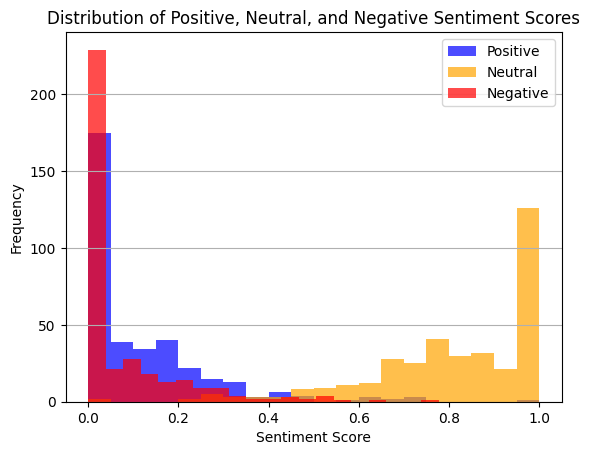

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for Positive, Neutral, and Negative scores together
plt.hist(merged_df['Positive'], bins=20, alpha=0.7, label='Positive', color='blue')
plt.hist(merged_df['Neutral'], bins=20, alpha=0.7, label='Neutral', color='orange')
plt.hist(merged_df['Negative'], bins=20, alpha=0.7, label='Negative', color='red')

# Add labels, title, and legend
plt.title('Distribution of Positive, Neutral, and Negative Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

#### TF-IDF

While I was doing research I found a csv file in github, that had comments from reddit for 28th Jan, 2021 and there was approximately 4000 lines of code. I realized I could use that to apply concepts learned in class, such as TF-IDF and Topic Modeling. The code used for this project have been modified Professor's Krisel class. [Krisel, 2024](https://github.com/rskrisel/tf-idf/blob/main/README.md) [Krisel, 2024](https://github.com/rskrisel/topic_modeling_workshop/blob/main/topic_modeling_tomotopy_workshop.ipynb)


In [ ]:
# Clone the repository
!git clone https://github.com/shokrof/Reddit_GME.git

# Change directory to the data folder
import os
os.chdir('Reddit_GME/data')

# Load the CSV file
import pandas as pd

Cloning into 'Reddit_GME'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 35 (delta 11), reused 21 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 9.65 MiB | 14.35 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('reddit_wsb_1-28.csv')
df.head(15)

,title,score,id,url,comms_num,created,body,timestamp\n
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
5,WE BREAKING THROUGH,405,l6uf7d,https://i.redd.it/2wef8tc062e61.png,84,1.611862e+09,NaN,2021-01-28 21:26:30
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31
8,Currently Holding AMC and NOK - Is it retarded...,200,l6ub4i,https://i.redd.it/6k2z7ouo42e61.png,161,1.611862e+09,NaN,2021-01-28 21:19:16
9,I have nothing to say but BRUH I am speechless...,291,l6uas9,https://i.redd.it/bfzzw2yo42e61.jpg,27,1.611862e+09,NaN,2021-01-28 21:18:37


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['text'] = df['title'].fillna('')  # Fill NaN with empty strings

# Define a function to clean text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)


In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
print(df[['text', 'cleaned_text']].head())

                                                text  \
0  It's not about the money, it's about sending a...   
1  Math Professor Scott Steiner says the numbers ...   
2                                    Exit the system   
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...   
4  Not to distract from GME, just thought our AMC...   

                                        cleaned_text  
0                              money sending message  
1  math professor scott steiner says numbers spel...  
2                                        exit system  
3  new sec filing gme someone less retarded pleas...  
4            distract gme thought amc brothers aware  


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Count vectorizer
count_vectorizer = CountVectorizer()

# Compute term frequency
term_frequency_matrix = count_vectorizer.fit_transform(df['cleaned_text'])

# Convert to DataFrame
term_frequency_df = pd.DataFrame(term_frequency_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Sum term frequencies across all documents
term_frequencies = term_frequency_df.sum().sort_values(ascending=False)

# Display top 10 terms
print(term_frequencies.head(25))

robinhood    283
gme          246
buy          131
amc          115
nok           77
hold          67
us            60
rh            58
let           55
sell          50
stock         47
stocks        46
still         42
get           40
app           39
bb            38
trading       37
buying        36
fucking       34
going         34
market        32
short         32
money         31
like          31
moon          30
dtype: int64


#### Topic Modeling

In [ ]:
pip install tomotopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 46.5 MB/s eta 0:00:00


In [ ]:
import tomotopy as tp

# Prepare the training data: cleaned text split into lists of words
training_data = [text.split() for text in df['cleaned_text']]

# Initialize the LDA model
num_topics = 8
model = tp.LDAModel(k=num_topics)

# Add each document to the model
for text in training_data:
    model.add_doc(text)

# Train the model
print("Topic Model Training...\n")
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

# Display the topics
print("\nTopic Model Results:\n")
num_topic_words = 6
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Training...

Iteration: 0	Log-likelihood: -8.264412792871827
Iteration: 10	Log-likelihood: -8.159291845199975
Iteration: 20	Log-likelihood: -8.103937525565565
Iteration: 30	Log-likelihood: -8.081762766480603
Iteration: 40	Log-likelihood: -8.00757984461091
Iteration: 50	Log-likelihood: -7.96458071650748
Iteration: 60	Log-likelihood: -7.9752104805266875
Iteration: 70	Log-likelihood: -7.924299967910163
Iteration: 80	Log-likelihood: -7.927380224803468
Iteration: 90	Log-likelihood: -7.908126635931177

Topic Model Results:

✨Topic 0✨

robinhood gme buy amc nok stocks

✨Topic 1✨

like short funds hedge make money

✨Topic 2✨

going new wsb need people today

✨Topic 3✨

gamestop melvin good money boys got

✨Topic 4✨

go get let fucking way stop

✨Topic 5✨

gme rh stock still time help

✨Topic 6✨

hold sell us let moon want

✨Topic 7✨

robinhood app market rh one star



The output of TF-IDF and topic modeling is able to capture the general sentiment. The term  which appears most frequently, indicating significant discussion around Robinhood in the dataset.
"gme" with 246 occurrences: the abbreviation for GameStop highlights the centrality of GME-related discussions.
Topic modeling shows group related terms, offering a high-level summary of conversations, such as stock trading strategies, platforms, and hedge fund-related conversations during the GME saga.

#### Limitations, Further Research and Conclusion

**Limitations:**

The analysis was confined to a narrow timeframe, focusing on the peak volatility of GME stock, which limited the examination of long-term sentiment trends and the evolution of narratives before and after the peak. By prioritizing high-scored comments from a manually extracted dataset and a single public CSV file, the study introduced selection bias, potentially overlooking diverse perspectives, including lower-visibility comments with valuable insights. Additionally, the informal, meme-driven language of Reddit, characterized by idiomatic expressions like "to the moon" or "diamond hands," posed challenges for standard NLP tools, potentially leading to misinterpretations. The public CSV dataset's unverified origin and collection methodology further raised concerns about data quality and representativeness, potentially affecting the comprehensiveness of the analysis. Contextual limitations of the topic modeling approach, such as LDA, restricted its ability to capture subtler themes, nuanced shifts in discussion tone, and overlapping or evolving topics over time. Furthermore, the project did not integrate detailed time-series data on GME’s stock price movements with sentiment and thematic analyses, limiting the ability to establish direct causal links between online narratives and price changes. Lastly, the study’s focus on GME and r/WallStreetBets reduced the generalizability of its findings to other meme stocks or online trading communities.


**Further Research:**

To enhance the analysis, future research could expand the temporal scope to include a longer timeframe, allowing for the examination of sentiment trends and narrative evolution beyond the peak volatility of GME stock. Incorporating additional public datasets and integrating them with real-time stock price movements would provide a richer context and enable a deeper exploration of the relationship between social media discussions and market dynamics. Alternative topic modeling techniques, such as neural network-based models, could be employed to uncover subtler themes and track the progression of narratives over time. Additionally, leveraging advanced deep learning models specifically designed to interpret the informal and context-rich language of social media could improve the accuracy of sentiment and topic analysis, capturing the nuance of expressions like "to the moon" or "diamond hands." By integrating detailed price movement data more comprehensively, the analysis could quantify the direct correlation between shifts in sentiment and trading activity, offering a clearer understanding of the mechanisms driving meme stock volatility. Using tools like FinBERT can be interesting to see how this tool’s output would be different from the likes of VADER and TextBlob.


**Conclusion:**

In this project I wanted to highlight the transformative role of online communities in reshaping the dynamics of financial markets, emphasizing the profound influence of collective sentiment on market volatility. It was hard to prove my hypothesis I set but I think this is a first step toward analyzing the sentiment and capturing themes of comments and discussion that happens in online communities like Reddit. Through the application of advanced NLP techniques, the research unveiled critical patterns and themes within online discussions, offering a robust framework for exploring the interplay between social media-driven sentiment and financial market behavior. An interesting observation was that both sentiment tools because of their predefined libraries which may not truly capture the sentiment expressed by users in online communities. On the other hand, we as humans, our way of communicating evolves so much, with the use of slang and expressing our feelings through emojis have been quite common. These tools on the other hand take the comment word for word and compute the sentiment which can be misleading. As mentioned earlier, this is the tiny step towards the vast scope ready to be explored.
